In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [31]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [33]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
data.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [35]:
#Logistic Regression is not a good algo
features = data.iloc[:,:-1].values
label = data.iloc[:,-1].values
#Categorical ---- Doesnt matter

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state = 13)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9583333333333334
0.9666666666666667


In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label,model.predict(features))
cm

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]], dtype=int64)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=7)
model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [28]:
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.975
1.0


In [29]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model.predict(X_test))
cm

array([[ 9,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 13]], dtype=int64)

In [30]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [31]:
data.species.value_counts()
#Since the count of each label is same, thus the given dataset is a Balanced dataset !!!

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [38]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,model.predict(X_test)))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         9
 versicolor       1.00      0.88      0.93         8
  virginica       0.93      1.00      0.96        13

avg / total       0.97      0.97      0.97        30



In [39]:
print(classification_report(label,model.predict(features)))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.98      0.90      0.94        50
  virginica       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150



In [28]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc

label

y = label_binarize(label, classes=['setosa','versicolor','virginica'])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=13)


array([1, 0, 0])

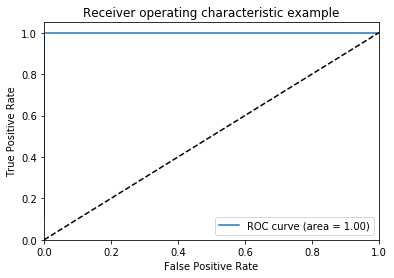

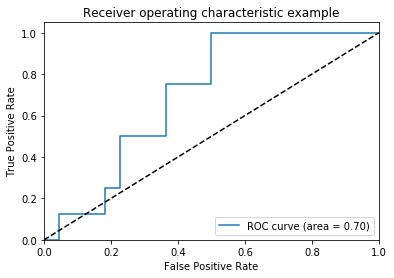

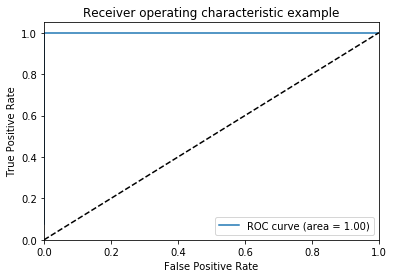

In [27]:
# classifier
clf = OneVsRestClassifier(LogisticRegression())
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()